# Import Libraries and Load Dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np


# Load and Preprocess Data

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Define Custom Activation Layers

In [ ]:
k0_1 = torch.randn(1, requires_grad=True)
alpha_1 = torch.randn(1, requires_grad=True)

k0_2 = torch.randn(1, requires_grad=True)
alpha_2 = torch.randn(1, requires_grad=True)

k0_3 = torch.randn(1, requires_grad=True)
alpha_3 = torch.randn(1, requires_grad=True)

k0_4 = torch.randn(1, requires_grad=True)
alpha_4 = torch.randn(1, requires_grad=True)

def custom_activation(x, k0, alpha):
    linear_term = k0 * x
    exp_term = alpha * torch.exp(-x**2)
    return linear_term + exp_term


# Define Neural Network Layers

In [ ]:
input_size = 4
hidden_size = 10
output_size = 3

fc1 = nn.Linear(input_size, hidden_size)
fc2 = nn.Linear(hidden_size, hidden_size)
fc3 = nn.Linear(hidden_size, hidden_size)
fc4 = nn.Linear(hidden_size, hidden_size)
fc5 = nn.Linear(hidden_size, output_size)


# Training Preparation

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam([{'params': fc1.parameters()},
                        {'params': fc2.parameters()},
                        {'params': fc3.parameters()},
                        {'params': fc4.parameters()},
                        {'params': fc5.parameters()},
                        {'params': [k0_1, alpha_1, k0_2, alpha_2, k0_3, alpha_3, k0_4, alpha_4]}], lr=0.001)

num_epochs = 1000

train_losses = []
train_accuracies = []
k0_values = {1: [], 2: [], 3: [], 4: []}
alpha_values = {1: [], 2: [], 3: [], 4: []}


# Training Loop

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        # Forward pass
        x = fc1(inputs)
        x = custom_activation(x, k0_1, alpha_1)
        x = fc2(x)
        x = custom_activation(x, k0_2, alpha_2)
        x = fc3(x)
        x = custom_activation(x, k0_3, alpha_3)
        x = fc4(x)
        x = custom_activation(x, k0_4, alpha_4)
        outputs = fc5(x)

        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    accuracy = 100 * correct / total
    train_accuracies.append(accuracy)

    k0_values[1].append(k0_1.item())
    alpha_values[1].append(alpha_1.item())
    k0_values[2].append(k0_2.item())
    alpha_values[2].append(alpha_2.item())
    k0_values[3].append(k0_3.item())
    alpha_values[3].append(alpha_3.item())
    k0_values[4].append(k0_4.item())
    alpha_values[4].append(alpha_4.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy:.2f}%')


Epoch [10/1000], Loss: 0.8782, Train Accuracy: 88.57%
Epoch [20/1000], Loss: 0.4277, Train Accuracy: 85.71%
Epoch [30/1000], Loss: 0.2028, Train Accuracy: 95.24%
Epoch [40/1000], Loss: 0.1365, Train Accuracy: 95.24%
Epoch [50/1000], Loss: 0.1115, Train Accuracy: 96.19%
Epoch [60/1000], Loss: 0.0615, Train Accuracy: 97.14%
Epoch [70/1000], Loss: 0.0601, Train Accuracy: 98.10%
Epoch [80/1000], Loss: 0.0718, Train Accuracy: 96.19%
Epoch [90/1000], Loss: 0.0529, Train Accuracy: 98.10%
Epoch [100/1000], Loss: 0.0501, Train Accuracy: 98.10%
Epoch [110/1000], Loss: 0.0510, Train Accuracy: 98.10%
Epoch [120/1000], Loss: 0.0508, Train Accuracy: 98.10%
Epoch [130/1000], Loss: 0.0506, Train Accuracy: 97.14%
Epoch [140/1000], Loss: 0.0595, Train Accuracy: 98.10%
Epoch [150/1000], Loss: 0.0577, Train Accuracy: 97.14%
Epoch [160/1000], Loss: 0.0634, Train Accuracy: 96.19%
Epoch [170/1000], Loss: 0.0545, Train Accuracy: 98.10%
Epoch [180/1000], Loss: 0.0453, Train Accuracy: 98.10%
Epoch [190/1000], L

# Testing Loop

In [ ]:
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        x = fc1(inputs)
        x = custom_activation(x, k0_1, alpha_1)
        x = fc2(x)
        x = custom_activation(x, k0_2, alpha_2)
        x = fc3(x)
        x = custom_activation(x, k0_3, alpha_3)
        x = fc4(x)
        x = custom_activation(x, k0_4, alpha_4)
        outputs = fc5(x)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.tolist())
        all_preds.extend(predicted.tolist())

test_accuracy = 100 * correct / total
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"\nTest Accuracy: {test_accuracy:.2f}%")
print(f"F1-Score: {f1:.4f}")



Test Accuracy: 97.78%
F1-Score: 0.9777


# Plotting Training History and Parameters

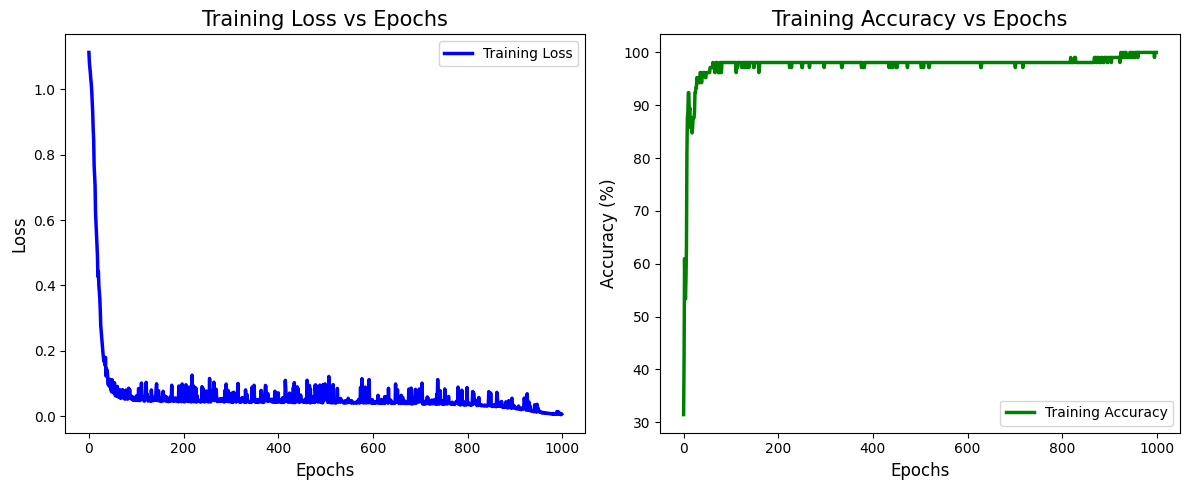

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, color='blue', linewidth=2.5, label="Training Loss")
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss vs Epochs', fontsize=15)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, color='green', linewidth=2.5, label="Training Accuracy")
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Training Accuracy vs Epochs', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()


# Plot Learnable Parameters Over Epochs

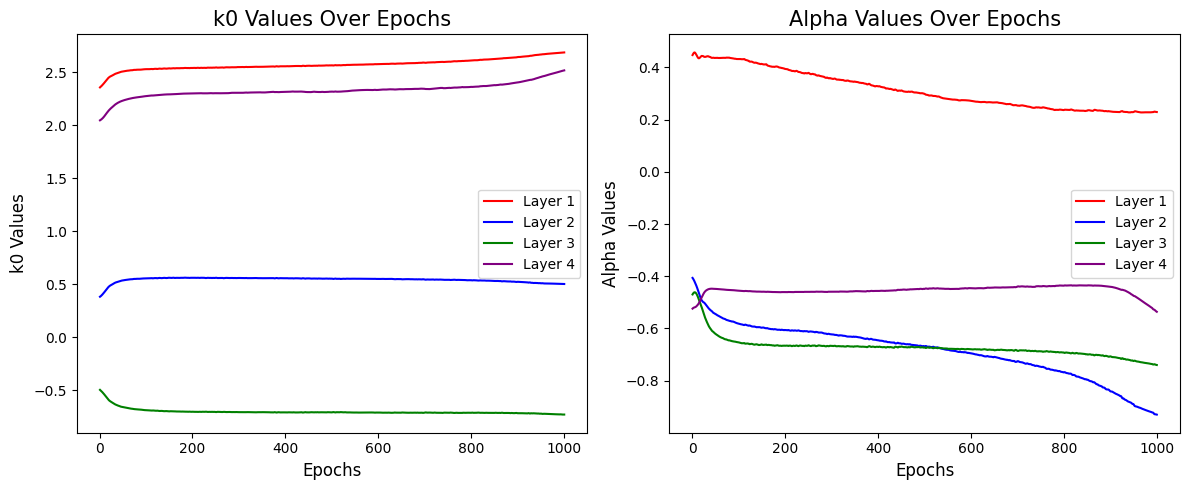

In [ ]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, k0_values[1], label="Layer 1", color='red')
plt.plot(epochs, k0_values[2], label="Layer 2", color='blue')
plt.plot(epochs, k0_values[3], label="Layer 3", color='green')
plt.plot(epochs, k0_values[4], label="Layer 4", color='purple')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('k0 Values', fontsize=12)
plt.title('k0 Values Over Epochs', fontsize=15)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, alpha_values[1], label="Layer 1", color='red')
plt.plot(epochs, alpha_values[2], label="Layer 2", color='blue')
plt.plot(epochs, alpha_values[3], label="Layer 3", color='green')
plt.plot(epochs, alpha_values[4], label="Layer 4", color='purple')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Alpha Values', fontsize=12)
plt.title('Alpha Values Over Epochs', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()


# Display Final Learnable Parameters

In [ ]:
print(f"\nFinal Learnable Activation Parameters for Layer 1:")
print(f"k0: {k0_1.item()}, alpha: {alpha_1.item()}")

print(f"\nFinal Learnable Activation Parameters for Layer 2:")
print(f"k0: {k0_2.item()}, alpha: {alpha_2.item()}")

print(f"\nFinal Learnable Activation Parameters for Layer 3:")
print(f"k0: {k0_3.item()}, alpha: {alpha_3.item()}")

print(f"\nFinal Learnable Activation Parameters for Layer 4:")
print(f"k0: {k0_4.item()}, alpha: {alpha_4.item()}")



Final Learnable Activation Parameters for Layer 1:
k0: 2.685556411743164, alpha: 0.22910964488983154

Final Learnable Activation Parameters for Layer 2:
k0: 0.5010308623313904, alpha: -0.9301530718803406

Final Learnable Activation Parameters for Layer 3:
k0: -0.7306621670722961, alpha: -0.7400794625282288

Final Learnable Activation Parameters for Layer 4:
k0: 2.516216516494751, alpha: -0.5361663103103638
